In [1]:
import pandas as pd
from scipy.stats.stats import pearsonr
import numpy as np
import scipy.stats as s
import seaborn as sns
from matplotlib import pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
original_dataset = pd.read_csv("./datasets/tumor_data")

In [3]:
#for checking null values in any column
original_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
working_dataset = original_dataset.iloc[:,1:32]
working_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
row_indices = np.arange(0,len(working_dataset))
np.random.shuffle(row_indices)


In [6]:
shuffled_dataset = working_dataset.iloc[row_indices]
shuffled_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
399,B,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,...,13.45,24.49,86.00,562.0,0.12440,0.17260,0.14490,0.05356,0.2779,0.08121
396,B,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,...,14.80,27.20,97.33,675.2,0.14280,0.25700,0.34380,0.14530,0.2666,0.07686
336,B,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,...,13.72,16.91,87.38,576.0,0.11420,0.19750,0.14500,0.05850,0.2432,0.10090
443,B,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
135,M,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,...,14.49,33.37,92.04,653.6,0.14190,0.15230,0.21770,0.09331,0.2829,0.08067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,B,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
499,M,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,...,23.86,30.76,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999
173,B,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,...,11.35,16.82,72.01,396.5,0.12160,0.08240,0.03938,0.04306,0.1902,0.07313
482,B,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326


In [7]:
#for converting the column_values to unique number 
def converstion(dataset,column_name):
    unique_values = dataset[column_name].unique().tolist()
    unique_values.sort()
    convert = {column_name : {k: v for k,v in zip(unique_values,list(range(0,len(unique_values))))}}
    dataset.replace(convert,inplace=True)

In [8]:
converstion(working_dataset,'diagnosis')

In [9]:
# for removing the single value column from a dataset
def remove_value_column(dataset_name,column_name):
    if len(dataset_name[column_name].unique()) == 1:
        dataset_name.drop([column_name], axis=1,inplace=True)

In [10]:
for column in working_dataset.columns:
    remove_value_column(working_dataset,column)

In [11]:
working_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
working_dataset.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


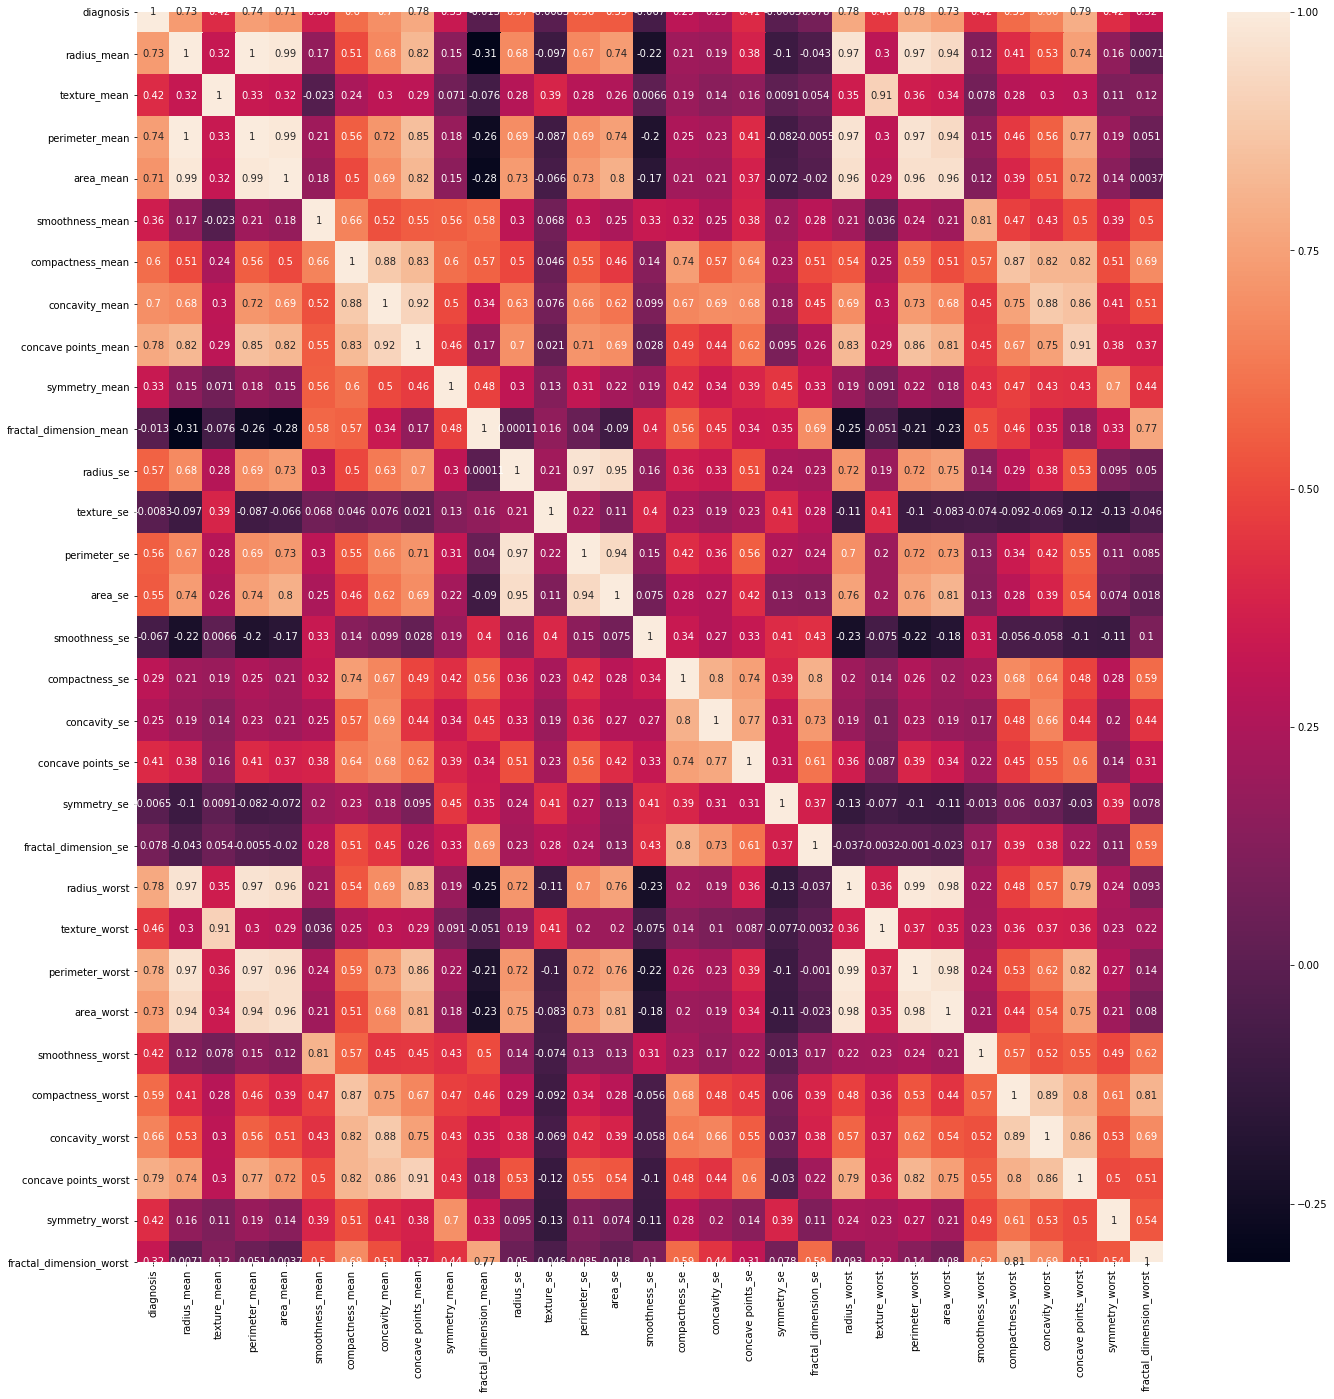

In [13]:
# for making the heatmap of correlation
fig, ax= plt.subplots(1, 1, figsize = (23, 23))
sns.heatmap(working_dataset.corr(), ax = ax, annot = True)
plt.show()

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

$$ \text{r} = \frac{\text{Covariance (x,y) }}{\sqrt(x).\sqrt(y)} $$

\begin{equation}
r/\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} 
\end{equation}

In [14]:
# Calculates a Pearson correlation coefficient
def check_pearson(column_name):
    r = pearsonr(working_dataset['diagnosis'],working_dataset[column_name])
    return abs(r[0])

In [15]:
# pearson correaltion of each column with target variable 'class'
pearson_correlation = {}
for single_column in working_dataset.columns[1:]:
    pearson_correlation[single_column] = check_pearson(single_column)

In [16]:
pearson_correlation

{'radius_mean': 0.7300285113754564,
 'texture_mean': 0.4151852998452044,
 'perimeter_mean': 0.7426355297258331,
 'area_mean': 0.70898383658539,
 'smoothness_mean': 0.3585599650859321,
 'compactness_mean': 0.5965336775082533,
 'concavity_mean': 0.6963597071719058,
 'concave points_mean': 0.7766138400204354,
 'symmetry_mean': 0.3304985542625471,
 'fractal_dimension_mean': 0.012837602698432378,
 'radius_se': 0.5671338208247177,
 'texture_se': 0.00830333297387742,
 'perimeter_se': 0.5561407034314831,
 'area_se': 0.5482359402780244,
 'smoothness_se': 0.0670160105794873,
 'compactness_se': 0.29299924424885837,
 'concavity_se': 0.25372976598083036,
 'concave points_se': 0.4080423327165046,
 'symmetry_se': 0.006521755870647988,
 'fractal_dimension_se': 0.07797241739025614,
 'radius_worst': 0.7764537785950396,
 'texture_worst': 0.4569028213967983,
 'perimeter_worst': 0.7829141371737592,
 'area_worst': 0.733825034921051,
 'smoothness_worst': 0.4214648610664027,
 'compactness_worst': 0.5909982378

In [17]:
#for sorting in the descending order to get the dependent of features
sorted_pearson=sorted(pearson_correlation.items(), key=lambda x: x[1], reverse=True)

In [18]:
sorted_pearson

[('concave points_worst', 0.79356601714127),
 ('perimeter_worst', 0.7829141371737592),
 ('concave points_mean', 0.7766138400204354),
 ('radius_worst', 0.7764537785950396),
 ('perimeter_mean', 0.7426355297258331),
 ('area_worst', 0.733825034921051),
 ('radius_mean', 0.7300285113754564),
 ('area_mean', 0.70898383658539),
 ('concavity_mean', 0.6963597071719058),
 ('concavity_worst', 0.659610210369233),
 ('compactness_mean', 0.5965336775082533),
 ('compactness_worst', 0.590998237841792),
 ('radius_se', 0.5671338208247177),
 ('perimeter_se', 0.5561407034314831),
 ('area_se', 0.5482359402780244),
 ('texture_worst', 0.4569028213967983),
 ('smoothness_worst', 0.4214648610664027),
 ('symmetry_worst', 0.4162943110486191),
 ('texture_mean', 0.4151852998452044),
 ('concave points_se', 0.4080423327165046),
 ('smoothness_mean', 0.3585599650859321),
 ('symmetry_mean', 0.3304985542625471),
 ('fractal_dimension_worst', 0.3238721887208239),
 ('compactness_se', 0.29299924424885837),
 ('concavity_se', 0.2

In [19]:
target_variable = 'diagnosis'

In [20]:
list_of_feature_variable = []

In [21]:
number_of_feartures=int(input("enter the number of features "))
number_of_feartures

enter the number of features 1


1

In [22]:
for i in range(0,number_of_feartures):
    list_of_feature_variable.append(sorted_pearson[i][0])

In [23]:
list_of_feature_variable[0]

'concave points_worst'

In [24]:
def normal_likelihood_function(dataset,column_name):
    mu_cap = dataset[column_name].mean()
    sigma_cap = dataset[column_name].std()
    estimate_normal = np.sum(s.norm.logpdf(dataset[column_name],loc=mu_cap,scale=sigma_cap))
    return estimate_normal

In [25]:
def rayleigh_likelihood_function(dataset,column_name):
    sigma_cap = np.sqrt(np.mean(dataset[column_name].apply(lambda x: x**2))/2)
    estimate_rayleigh = np.sum(s.rayleigh.logpdf(dataset[column_name],scale=sigma_cap))
    return estimate_rayleigh

In [26]:
def type_of_column(dataset,column_name):
    if type(dataset[column_name].iloc[0]) == str or type(dataset[column_name].iloc[0])==int and len(dataset[column_name].unique()) < len(dataset[column_name]):
        if len(dataset[column_name].unique()) == 2:
            return 'binomial'
        else:
            return 'multinomial'
    else:
        est_normal = normal_likelihood_function(dataset,column_name)
        
        est_rayleigh = rayleigh_likelihood_function(dataset,column_name)
        
        if est_normal > est_rayleigh:
            return 'normal'
        else:
            return 'rayleigh'

In [27]:
type_of_column(working_dataset,list_of_feature_variable[0])

'normal'

In [28]:
selected_dataset = shuffled_dataset[['diagnosis',list_of_feature_variable[0]]]

In [29]:
selected_dataset

,diagnosis,concave points_worst
399,B,0.05356
396,B,0.14530
336,B,0.05850
443,B,0.02222
135,M,0.09331
...,...,...
136,B,0.06968
499,M,0.21130
173,B,0.04306
482,B,0.13350


In [30]:
# for getting the 75% training data
training_data = selected_dataset.iloc[0:int(0.75*len(selected_dataset))]

In [31]:
training_data

,diagnosis,concave points_worst
399,B,0.05356
396,B,0.14530
336,B,0.05850
443,B,0.02222
135,M,0.09331
...,...,...
530,B,0.10100
171,M,0.11600
258,M,0.24620
332,B,0.02022


In [32]:
# getting e class training data for getting the......
# PRIOR PROBABILITY of target variable CLASS 'e'

b_training_data = training_data[training_data[target_variable] == 'B']
b_training_data

,diagnosis,concave points_worst
399,B,0.05356
396,B,0.14530
336,B,0.05850
443,B,0.02222
37,B,0.05013
...,...,...
286,B,0.11550
346,B,0.05093
491,B,0.08341
530,B,0.10100


In [33]:
# getting e class training data for getting the......
# PRIOR PROBABILITY of target variable CLASS 'p'
m_training_data = training_data[training_data[target_variable] == 'M']
m_training_data

,diagnosis,concave points_worst
135,M,0.09331
36,M,0.14470
26,M,0.27010
117,M,0.20270
352,M,0.27560
...,...,...
330,M,0.19810
91,M,0.14760
171,M,0.11600
258,M,0.24620


In [34]:
remaining_data = selected_dataset.iloc[int(0.75*len(selected_dataset)):]

In [35]:
remaining_data

,diagnosis,concave points_worst
298,B,0.07530
199,M,0.18380
110,B,0.05334
182,M,0.15410
542,B,0.10950
...,...,...
136,B,0.06968
499,M,0.21130
173,B,0.04306
482,B,0.13350


In [36]:
validation_data = remaining_data.iloc[0:int(0.33*len(remaining_data))]
validation_data

,diagnosis,concave points_worst
298,B,0.07530
199,M,0.18380
110,B,0.05334
182,M,0.15410
542,B,0.10950
139,B,0.08611
162,M,0.22470
517,M,0.16130
174,B,0.00000
382,B,0.10920


In [37]:
testing_data = remaining_data.iloc[int(0.33*len(remaining_data)):]
testing_data

,diagnosis,concave points_worst
422,B,0.11050
360,B,0.01635
147,B,0.08405
394,B,0.06266
552,B,0.06498
...,...,...
136,B,0.06968
499,M,0.21130
173,B,0.04306
482,B,0.13350


In [38]:
# for getting the relative frequency of the values in the particular column in the dataset
def relative_frequency(dataset,column):
    frequency = dataset[column].value_counts()
    rf = np.array(frequency)/dataset.shape[0]
    rf_column = dict(zip(frequency.keys(),rf))
    return rf_column
#     return {column : {k: v for k,v in zip(frequency,frequency/training_data.shape[0])}}

In [39]:
target_frequency = relative_frequency(training_data,'diagnosis')
target_frequency

{'B': 0.6455399061032864, 'M': 0.3544600938967136}

$$\text{Naive Bayes Classifier}\$$

\begin{equation}
P(A|B) = \frac{P(B|A)*P(A)}{P(B)}
\end{equation}
\
\
\begin{equation}
\text{P(target var|feature var)} = \frac{\text{P(feature var|target var) * P(target var)}}{\text{P(feature var)}}
\end{equation}
\
\
\begin{equation}
P(A|B1,B2,B3,B4.......Bn) = \frac{P(B1|A)*P(B2|A)*P(B3|A) ...*P(Bn|A)*P(A)}{P(B1)*P(B2)*P(B3) *....*P(Bn)}
\end{equation}

\
\
\begin{equation}
\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )} = \frac{\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var) * P(target var)}}{\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n)}}
\end{equation}

\begin{equation}
\text{Posterior Probability}\\\text{P(A|B1,B2,B3.......Bn)}\\
\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )}
\end{equation}

\begin{equation}
\text{Likelihood probability}\\\text{P(B1|A) * P(B2|A) * P(B3|A) *...* P(Bn|A)}\\
\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var)}
\end{equation}

\begin{equation}
\text{Prior Probability}\\ \text{P(A)}\\
\text{P(target var)}
\end{equation}

\begin{equation}
\text{Evidence or Normalizing Probability }\\
{P(B1)*P(B2)*P(B3) *....*P(Bn)}\\
\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n))}
\end{equation}

\begin{equation}
\text{Prior Probability}\\ \text{P(A) => P(class='e')}
\end{equation}

In [40]:
training_prior_prob_b = target_frequency['B']
training_prior_prob_m = target_frequency['M']
print(training_prior_prob_b,training_prior_prob_m)

0.6455399061032864 0.3544600938967136


In [41]:

mu_b_training = b_training_data[list_of_feature_variable[0]].mean()
print(mu_b_training)
sigma_b_training = b_training_data[list_of_feature_variable[0]].std()
print(sigma_b_training)

0.07397309454545459
0.03706268481159432


In [42]:
mu_m_training = m_training_data[list_of_feature_variable[0]].mean()
print(mu_m_training)
sigma_m_training = m_training_data[list_of_feature_variable[0]].std()
print(sigma_m_training)

0.1803351655629139
0.04667018901260639


It's not a bug. It's not an incorrect result either. Probability density function's value at some specific point does not give you probability; it is a measure of how dense the distribution is around that value. For continuous random variables, the probability at a given point is equal to zero. Instead of p(X = x), we calculate probabilities between 2 points p(x1 < X < x2) and it is equal to the area below that probability density function. Probability density function's value can very well be above 1. It can even approach to infinity.

In [43]:
s.norm.pdf(b_training_data[list_of_feature_variable[0]],loc=mu_b_training,scale=sigma_b_training)

array([ 9.24914489,  1.68939078,  9.86565417,  4.06041939,  8.75195425,
        9.86411881, 10.76369541,  3.51451901,  1.58650483,  8.13660487,
        1.46875456,  4.63260618,  8.96961877,  8.10103817,  8.16939971,
       10.04481393, 10.50455652,  9.55484566, 10.42636451, 10.31548958,
        7.20082204, 10.45760249,  7.86964619, 10.76277253, 10.71171908,
        0.2621358 , 10.64281625, 10.67247885, 10.36910952, 10.60305564,
       10.24051949,  7.79381124,  4.59918948,  7.83703636, 10.46835996,
       10.21191724, 10.55534617, 10.46460309,  8.81091335,  9.03008519,
       10.75195286, 10.64151657,  8.5247597 ,  4.49610698, 10.69822751,
       10.4524154 ,  8.35964794,  9.68041501,  9.52321756,  8.86332782,
        8.39805143,  5.32819252,  9.57116166,  2.47447679,  7.14959337,
        4.04208209,  4.04913548, 10.07042771,  1.46875456,  7.14851334,
       10.64081238,  1.46875456,  4.6234899 ,  8.84184913,  8.28394281,
        8.0779422 ,  6.03981291,  2.43192551,  8.3772713 ,  9.42

\begin{equation}
\text{Posterior Probability}\\\text{P(A|B1,B2,B3.......Bn)}\\
\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )}
\end{equation}

\begin{equation}
\text{Likelihood probability}\\\text{P(B1|A) * P(B2|A) * P(B3|A) *...* P(Bn|A)}\\
\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var)}
\end{equation}

\begin{equation}
\text{Prior Probability}\\ \text{P(A)}\\
\text{P(target var)}
\end{equation}

\begin{equation}
\text{Evidence or Normalizing Probability }\\
{P(B1)*P(B2)*P(B3) *....*P(Bn)}\\
\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n))}
\end{equation}

$$\text{Posterior Probability} = \frac{\text{Likelihood Probability} * \text{Prior Probability}}{\text{Normalizing Probability}}$$

$$\text{P( target var|feature var1, feature var2, feature var3, ... ,feature var(n) )} = \frac{\text{P(feature var1|target var) * P(feature var2|target var) * P(feature var3|target var) *...* P(feature var(n)|target var) * P(target var)}}{\text{P(feature var1) * P(feature var2) * P(feature var3) *...* P(feature var(n)}}$$

In [44]:
def predicted_category(single_row):
    
    likelihood_m = s.norm.pdf(single_row,loc=mu_m_training,scale=sigma_m_training)
    likelihood_b = s.norm.pdf(single_row,loc=mu_b_training,scale=sigma_b_training)
    
    numerator = likelihood_m * training_prior_prob_m
    
    dinominator = numerator + (likelihood_b * training_prior_prob_b)
    
    posterior_m = numerator/dinominator
    
    return np.uint(posterior_m > 0.5)

In [46]:
validation_predicted_answers = predicted_category(validation_data['concave points_worst'])
    

In [47]:
validation_predicted_answers = np.array(validation_predicted_answers)
validation_predicted_answers

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=uint32)

In [48]:
validation_data

,diagnosis,concave points_worst
298,B,0.07530
199,M,0.18380
110,B,0.05334
182,M,0.15410
542,B,0.10950
139,B,0.08611
162,M,0.22470
517,M,0.16130
174,B,0.00000
382,B,0.10920


In [49]:
converstion(validation_data,'diagnosis')

C:\Users\Mohnish\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [50]:
validation_data.shape[0]

47

In [51]:
validation_actual_answers = np.array(validation_data['diagnosis'])
validation_actual_answers

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [52]:
validation_correct_count = np.count_nonzero(validation_predicted_answers == validation_actual_answers)
validation_correct_count

45

In [53]:
validation_correct_count/validation_data.shape[0]

0.9574468085106383

In [54]:
validation_accuracy = (validation_correct_count/validation_data.shape[0])*100

In [55]:
validation_accuracy

95.74468085106383

In [56]:
testing_predicted_answers = []

In [57]:
testing_predicted_answers.append(predicted_category(testing_data['concave points_worst']))
    

In [58]:
testing_predicted_answers

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 0], dtype=uint32)]

In [59]:
testing_data

,diagnosis,concave points_worst
422,B,0.11050
360,B,0.01635
147,B,0.08405
394,B,0.06266
552,B,0.06498
...,...,...
136,B,0.06968
499,M,0.21130
173,B,0.04306
482,B,0.13350


In [60]:
converstion(testing_data,'diagnosis')

In [61]:
testing_data

,diagnosis,concave points_worst
422,0,0.11050
360,0,0.01635
147,0,0.08405
394,0,0.06266
552,0,0.06498
...,...,...
136,0,0.06968
499,1,0.21130
173,0,0.04306
482,0,0.13350


In [62]:
testing_actual_answers = np.array(testing_data['diagnosis'])

In [63]:
testing_actual_answers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
testing_correct_count = np.count_nonzero(testing_actual_answers == testing_predicted_answers)

In [65]:
testing_correct_count

91

In [66]:
testing_accuracy = (testing_correct_count/testing_data.shape[0])*100

In [67]:
testing_accuracy

94.79166666666666

In [68]:
confusion_matrix = pd.crosstab(testing_predicted_answers,testing_actual_answers, colnames= ['actual'], rownames = ['predicted'], margins = True)

In [69]:
confusion_matrix

actual,0,1,All
predicted,,,
0,54,3,57
1,2,37,39
All,56,40,96


In [70]:
TP = confusion_matrix[0][0]
print('True Positive',TP)
TN = confusion_matrix[1][1]
print('True Negative',TN)
FP = confusion_matrix[0][1]
print('False Positive',FP)
FN = confusion_matrix[1][0]
print('False Negative',FN)

True Positive 54
True Negative 37
False Positive 2
False Negative 3
